![imagen](../../images/ejercicios.png)

# Ejercicio 1 

Carga los datos de imagenes de gatos y perros alojados en:

https://raw.githubusercontent.com/bioramble/pca/master/cat.csv

https://raw.githubusercontent.com/bioramble/pca/master/dog.csv

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [2]:
cats=np.array(pd.read_csv('https://raw.githubusercontent.com/bioramble/pca/master/cat.csv', header=None))
dogs=np.array(pd.read_csv('https://raw.githubusercontent.com/bioramble/pca/master/dog.csv', header=None))

In [3]:
print(cats.shape)
print(dogs.shape)

(4096, 80)
(4096, 80)


# Ejercicio 2

Realiza un plot con una imagen de un gato y una imagen de una perro.

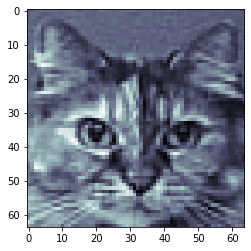

In [4]:
fig, ax=plt.subplots()

ax.imshow(cats[:,79].reshape(64, 64).T, cmap='bone');

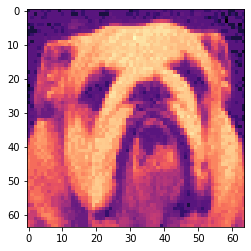

In [5]:
fig, ax=plt.subplots()

ax.imshow(dogs[:,78].reshape(64, 64).T, cmap='magma');

# Ejercicio 3

Normaliza los datos y concatena ambos arrays.

In [6]:
def standardize(x):
    x=(x-np.mean(x, axis=0))/np.std(x, axis=0)
    return x

In [7]:
animals=np.concatenate((dogs, cats), axis=1)

In [8]:
animals_stand=standardize(animals)

animals_stand.shape

(4096, 160)

# Ejercicio 4

Realiza la transformacion PCA para bajar a 2 y/o 3 componentes.

**Tip: Realiza el producto escalar np.dot entre los datos normalizados y los datos de PCA. La dimension final ha de ser (160, 2) y/o (160, 3)**

In [9]:
# 2 componentes

pca=PCA(n_components=2).fit_transform(animals_stand)

pca.shape

(4096, 2)

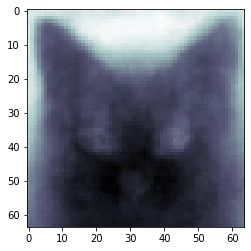

In [10]:
fig, ax=plt.subplots()

ax.imshow(pca[:,0].reshape(64, 64).T, cmap='bone');

In [11]:
data_2=np.dot(animals_stand.T, pca)

data_2.shape

(160, 2)

In [12]:
# 3 componentes

pca=PCA(n_components=3).fit_transform(animals_stand)

pca.shape

(4096, 3)

In [13]:
data_3=np.dot(animals_stand.T, pca)

data_3.shape

(160, 3)

# Ejercicio 5

Representa los datos y trata de separarlos en el grafico.

In [14]:
# 2 componentes

proyection=pd.DataFrame(data_2, columns=['pc1', 'pc2'])

proyection.head()

,pc1,pc2
0,14348.513996,-3981.261848
1,10873.022704,5211.508531
2,-4378.848124,4874.922196
3,1717.007503,8914.441558
4,11101.884044,-1114.369782


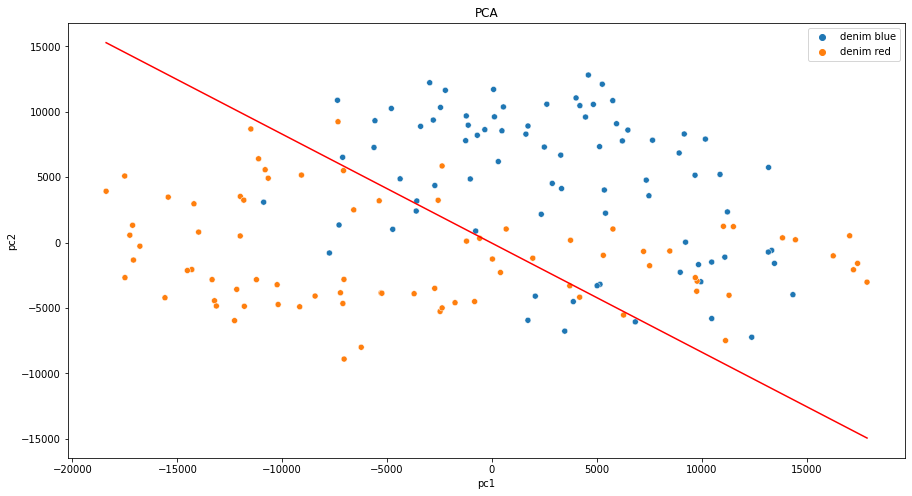

In [15]:
blue=['denim blue' for i in range(80)]
red=['denim red' for i in range(80)]

colors=blue+red

plt.figure(figsize=(15,8))
sns.scatterplot(proyection.pc1, proyection.pc2, hue=colors)       # azul=perros, rojo=gatos

sns.lineplot(proyection.pc1, (-5/6)*proyection.pc1-45, color='r')
plt.legend()
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('PCA')
plt.show();

In [16]:
# 3 componentes

proyection=pd.DataFrame(data_3, columns=['pc1', 'pc2', 'pc3'])

proyection.head()

,pc1,pc2,pc3
0,14348.514041,-3981.259471,-3910.473291
1,10873.022742,5211.510209,-1122.519158
2,-4378.848117,4874.922798,-3833.746869
3,1717.007508,8914.443317,1511.037180
4,11101.884042,-1114.370736,4519.992456


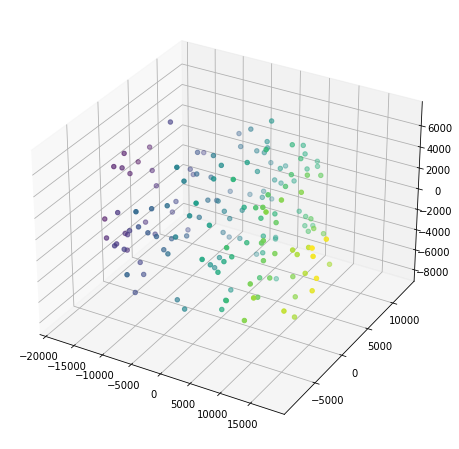

In [17]:
fig=plt.figure(figsize=(15,8))

ax=fig.gca(projection='3d')

ax.scatter(proyection.pc1, proyection.pc2, proyection.pc3, c=proyection.pc1)
plt.show();